In [4]:
#!pip install beautifulsoup4==4.9.3
#!pip install openpyxl

In [5]:
import requests
from bs4 import BeautifulSoup

import time

import pandas as pd

from datetime import datetime

In [6]:
max_page_num = int(input())

1


In [13]:
urls_list = []
titles = []
articles = []
comments = []
for now_page_num in range(1,max_page_num+1):
    try:
        url = "https://gall.dcinside.com/mgallery/board/lists/?id=dbd&page=" + str(now_page_num)
        headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}
        web = requests.get(url, headers=headers).content
        source = BeautifulSoup(web,'html.parser')

        # 글들 추려내기
        for urls in source.find_all('td', {'class','gall_tit ub-word'}):
            for urls2 in urls.find_all('a'):
                if urls2['href'].startswith("https://gall.dcinside.com/mgallery/board/view/?id=dbd&no="):
                    url_str = urls2['href'].replace('&t=cv',"")
                    urls_list.append(url_str)
    
    except:
        print("다음 게시글의 링크 스크랩 중 오류 발생: {}".format(url))
    
    # 게시글
    for url in urls_list:
        headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}
        web = requests.get(url, headers=headers).content
        source = BeautifulSoup(web,'html.parser')
        if not source.find('div',{'class':'write_div'}) == None:
            data_text = source.find('div',{'class':'write_div'}).get_text();
            data_text = data_text.replace("\n","")
            data_text = data_text.replace("\t","")
            data_text = data_text.replace("\xa0","")
            articles.append(data_text)
            print(data_text)
        if not source.find('span',{'class':'title_subject'}) == None:
            data_text = source.find('span',{'class':'title_subject'}).get_text();
            articles.append(data_text)
            print(data_text)
    time.sleep(5)

■ 새 소식개발자 업데이트 - 부정 행위 보고서 - 22.09.24 / 한 영 (NEW)개발자 업데이트 - 마지막 상징 - 22.09.23 / 한 영 (NEW)10월 커뮤니티 초이스 이벤트 투표 - 22.09.21 / 링크 (NEW)6.2.2 소규모 업데이트 - 22.09.13 / 한 영■ 이벤트■ 할인가을 세일 - 일부 캐릭터 및 의상 최대 50%까지 (~9.29) (NEW)■ 상점 코드CAWCAW자부심의 깃털(생&살) 기한 모름PRIDE2022진보의 깃발 부적(생&살)기한 모름PRIDE무지개 부적(생&살)기한 없음Nice69 블러드포인트 기한 없음코드 입력 방법① 상점 입장 후 왼쪽 상단 '새 소식' 탭 클릭② 우측 상단 '교환 코드' 클릭 후 코드 입력■ 비밀의 신전22.09.21 [짐승 같은 힘][어둠의 헌신][자기 증명][남자의 패기]비밀의 신전 기록소(22.1~현재)비밀의 신전 기록소(21.1~21.12)비밀의 신전 기록소(17.4~20.12)
데바데 패치, 이벤트, 할인, 코드, 신전
살인마퍽애드온생존자퍽아이템 & 애드온공물 정보생존자살인마공용플레이 팁글 모음기타 팁글 모음데바데 최적화 팁글 모음유용한 사이트 모음- 대표 사이트 5개 소개
데바데 마이너 갤러리 종합 정보 모음
1. 광고, 거래글, 어그로, 분탕, 도배⦁ 어그로 및 분탕은 완장 주관 및 갤 상태 보고 판단함⦁ 잡담글 괜찮지만 페이지당 3개까지만2. 야짤, 혐짤 등 금지⦁ 혐짤은 무조건 삭제, 야짤은 수위 보고 결정3. 네임드화, 친목 및 닉언⦁ 스샷에 나오는 닉들도 어지간해선 가려주길 권장⦁ 인게임 얘기 나누는 건 상관없지만 친목질로 간주되면 컷4. 저격 및 박제⦁ 박제는 핵, 매크로만 허용- 작성 시 증거와 계정 링크필참(외국인 & 밴 기록 있으면 필요 없음)- 누구인지 특정할 수 없게 결과창만 올리는 건 박제로 간주하지 않음- 상습적악질 유저 :예외적으로 허용,블포작 통수 : 인게임 이벤트 기간 내, 또는 상습적일 경우 예외적으로허용⦁ 저격글은 갤로그 공개한 고닉만 가능(저격용 

In [16]:
# 게시글 및 본문 엑셀 파일 저장
article_df = pd.DataFrame({'Article':articles})
from openpyxl import Workbook
article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M'),index=False,encoding='utf-8'))
article_df.head()

,Article
0,■ 새 소식개발자 업데이트 - 부정 행위 보고서 - 22.09.24 / 한 영 (N...
1,"데바데 패치, 이벤트, 할인, 코드, 신전"
2,살인마퍽애드온생존자퍽아이템 & 애드온공물 정보생존자살인마공용플레이 팁글 모음기타 팁...
3,데바데 마이너 갤러리 종합 정보 모음
4,"1. 광고, 거래글, 어그로, 분탕, 도배⦁ 어그로 및 분탕은 완장 주관 및 갤 상..."


In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_excel('./result_220925_0526.xlsx', engine='openpyxl')
df.head()

,Unnamed: 0,Article
0,0,■ 새 소식개발자 업데이트 - 부정 행위 보고서 - 22.09.24 / 한 영 (N...
1,1,"데바데 패치, 이벤트, 할인, 코드, 신전"
2,2,살인마퍽애드온생존자퍽아이템 & 애드온공물 정보생존자살인마공용플레이 팁글 모음기타 팁...
3,3,데바데 마이너 갤러리 종합 정보 모음
4,4,"1. 광고, 거래글, 어그로, 분탕, 도배⦁ 어그로 및 분탕은 완장 주관 및 갤 상..."


In [19]:
from konlpy.tag import Okt

In [20]:
articles = df['Article'].tolist()
articles = ' '.join(articles)

In [21]:
tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles,norm=True,stem=True) # POS Tagging
raw_pos_tagged[:1000]

[('■', 'Foreign'),
 ('새', 'Noun'),
 ('소식', 'Noun'),
 ('개발자', 'Noun'),
 ('업데이트', 'Noun'),
 ('-', 'Punctuation'),
 ('부정', 'Noun'),
 ('행위', 'Noun'),
 ('보고서', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('24', 'Number'),
 ('/', 'Punctuation'),
 ('하다', 'Verb'),
 ('영', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('개발자', 'Noun'),
 ('업데이트', 'Noun'),
 ('-', 'Punctuation'),
 ('마지막', 'Noun'),
 ('상징', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('23', 'Number'),
 ('/', 'Punctuation'),
 ('하다', 'Verb'),
 ('영', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('10월', 'Number'),
 ('커뮤니티', 'Noun'),
 ('초이스', 'Noun'),
 ('이벤트', 'Noun'),
 ('투표', 'Noun'),
 ('-', 'Punctuation'),
 ('22.09', 'Number'),
 ('.', 'Punctuation'),
 ('21', 'Number'),
 ('/', 'Punctuation'),
 ('링크', 'Noun'),
 ('(', 'Punctuation'),
 ('NEW', 'Alpha'),
 (')', 'Punctuation'),
 ('6.2', 'Number'),
 ('.', 'Punctuation')

In [22]:
del_list = ['하다']

word_cleaned = []

for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
        if (len(word[0]) != 1) & (word[0] not in del_list):
            word_cleaned.append(word[0])
            
word_cleaned

['소식',
 '개발자',
 '업데이트',
 '부정',
 '행위',
 '보고서',
 '22.09',
 '24',
 'NEW',
 '개발자',
 '업데이트',
 '마지막',
 '상징',
 '22.09',
 '23',
 'NEW',
 '10월',
 '커뮤니티',
 '초이스',
 '이벤트',
 '투표',
 '22.09',
 '21',
 '링크',
 'NEW',
 '6.2',
 '소규모',
 '업데이트',
 '22.09',
 '13',
 '이벤트',
 '할인',
 '가을',
 '일부',
 '캐릭터',
 '의상',
 '최대',
 '50%',
 '9.29',
 'NEW',
 '상점',
 '코드',
 'CAWCAW',
 '자부심',
 '깃털',
 '기한',
 '모름',
 'PRIDE',
 '2022',
 '진보',
 '깃발',
 '부적',
 '기한',
 '모름',
 'PRIDE',
 '무지개',
 '부적',
 '기한',
 '없다',
 'Nice',
 '69',
 '블러드',
 '포인트',
 '기한',
 '없다',
 '코드',
 '입력',
 '방법',
 '상점',
 '입장',
 '왼쪽',
 '상단',
 '소식',
 '클릭',
 '우측',
 '상단',
 '교환',
 '코드',
 '클릭',
 '코드',
 '입력',
 '비밀',
 '신전',
 '22.09',
 '21',
 '짐승',
 '같다',
 '어둠',
 '헌신',
 '자기',
 '증명',
 '남자',
 '패기',
 '비밀',
 '신전',
 '기록',
 '22.1',
 '현재',
 '비밀',
 '신전',
 '기록',
 '21.1',
 '21.12',
 '비밀',
 '신전',
 '기록',
 '17.4',
 '20.12',
 '데바',
 '패치',
 '이벤트',
 '할인',
 '코드',
 '신전',
 '살인마',
 '애드온',
 '생존자',
 '아이템',
 '애드온',
 '공물',
 '정보',
 '생존자',
 '살인마',
 '공용',
 '플레이',
 '팁글',
 '모음',
 '기타',
 '팁글',
 '모으다',
 '바데',
 '

In [29]:
from collections import Counter

result = Counter(word_cleaned)

word_dic = dict(result)
word_dic

{'소식': 2,
 '개발자': 2,
 '업데이트': 3,
 '부정': 1,
 '행위': 2,
 '보고서': 1,
 '22.09': 5,
 '24': 1,
 'NEW': 4,
 '마지막': 2,
 '상징': 1,
 '23': 1,
 '10월': 1,
 '커뮤니티': 1,
 '초이스': 1,
 '이벤트': 4,
 '투표': 1,
 '21': 2,
 '링크': 14,
 '6.2': 1,
 '소규모': 1,
 '13': 2,
 '할인': 2,
 '가을': 1,
 '일부': 1,
 '캐릭터': 2,
 '의상': 1,
 '최대': 1,
 '50%': 1,
 '9.29': 1,
 '상점': 2,
 '코드': 9,
 'CAWCAW': 1,
 '자부심': 1,
 '깃털': 1,
 '기한': 4,
 '모름': 2,
 'PRIDE': 2,
 '2022': 1,
 '진보': 1,
 '깃발': 1,
 '부적': 2,
 '무지개': 1,
 '없다': 11,
 'Nice': 1,
 '69': 1,
 '블러드': 2,
 '포인트': 1,
 '입력': 5,
 '방법': 3,
 '입장': 1,
 '왼쪽': 1,
 '상단': 2,
 '클릭': 4,
 '우측': 1,
 '교환': 2,
 '비밀': 4,
 '신전': 6,
 '짐승': 1,
 '같다': 7,
 '어둠': 1,
 '헌신': 1,
 '자기': 3,
 '증명': 2,
 '남자': 1,
 '패기': 3,
 '기록': 4,
 '22.1': 1,
 '현재': 3,
 '21.1': 1,
 '21.12': 1,
 '17.4': 1,
 '20.12': 1,
 '데바': 7,
 '패치': 1,
 '살인마': 6,
 '애드온': 4,
 '생존자': 4,
 '아이템': 1,
 '공물': 1,
 '정보': 3,
 '공용': 1,
 '플레이': 1,
 '팁글': 3,
 '모음': 4,
 '기타': 1,
 '모으다': 2,
 '바데': 2,
 '최적화': 1,
 '유용하다': 1,
 '사이트': 2,
 '대표': 1,
 '소개': 1,
 '마이너': 2,


In [24]:
!pip install wordcloud==1.5.0

     |████████████████████████████████| 361 kB 16.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 No module named 'PIL' 에러 -> pip install Pillow==5.4.1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
word_cloud = WordCloud(font_path='/usr/share/fonts/truetype/unfonts-core/UnBatangBold.ttf',
                       width=2000, height=2000,
                       prefer_horizontal= 1.0, # 단어들이 가로로만 그려짐
                       background_color='white')

In [30]:
word_cloud.generate_from_frequencies(word_dic)

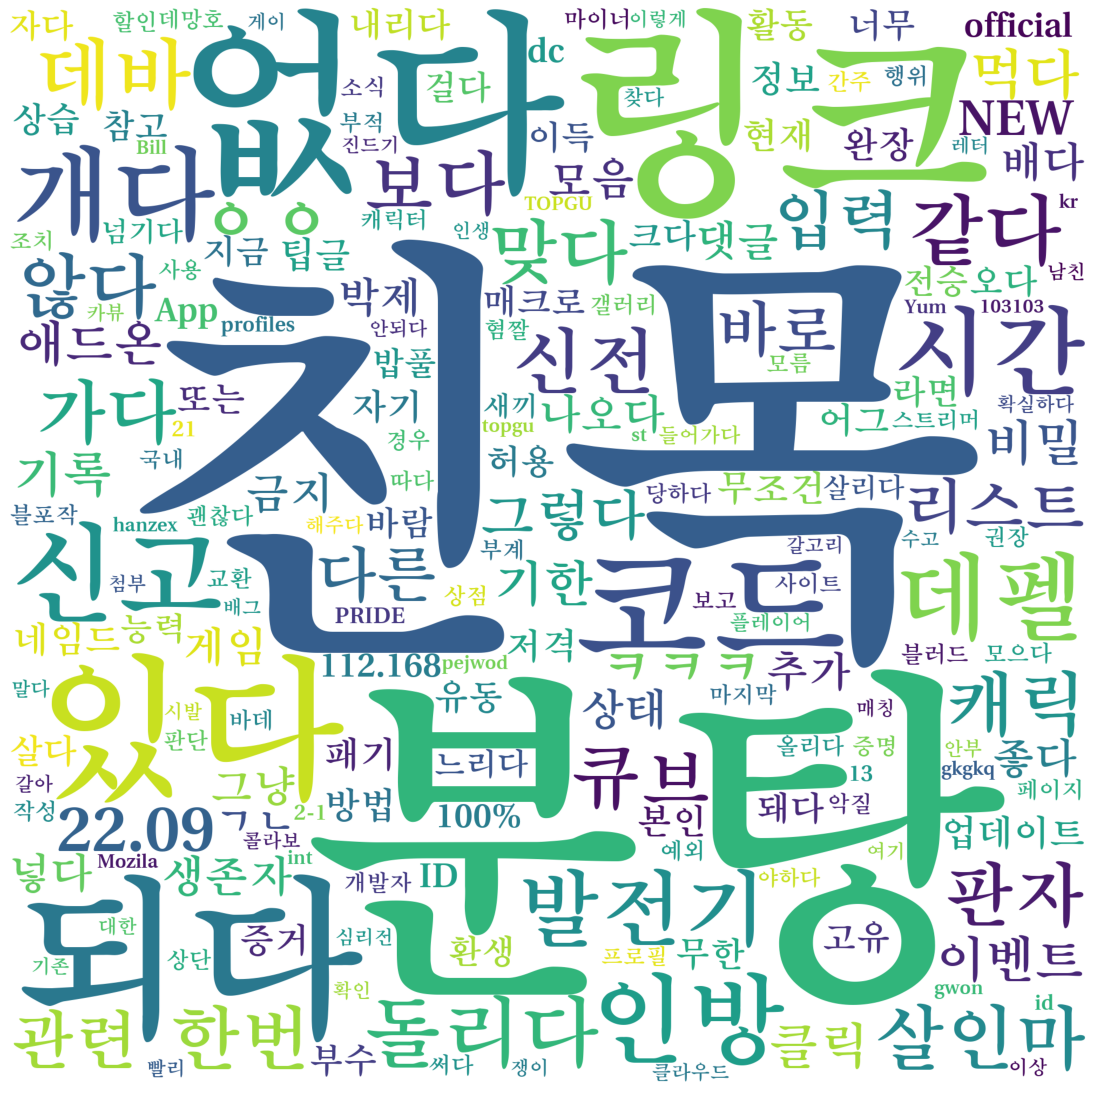

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()